In [1]:
import pandas as pd
import numpy as np
dt = pd.read_csv('house-votes-84.csv')

In [2]:
dt[dt['stand'] == 'democrat'] = dt[dt['stand'] == 'democrat'].replace('y',1)
dt[dt['stand'] == 'democrat'] = dt[dt['stand'] == 'democrat'].replace('n',0)

dt[dt['stand'] == 'republican'] = dt[dt['stand'] == 'republican'].replace('y',1)
dt[dt['stand'] == 'republican'] = dt[dt['stand'] == 'republican'].replace('n',0)

In [3]:
m = dt[dt['stand'] == 'democrat'].mode()
n = dt[dt['stand'] == 'republican'].mode()

dt1 = dt[dt['stand'] == 'republican']
dt2 = dt[dt['stand'] == 'democrat']

for i in range(1,17):
    for j in range(dt1.shape[0]):
        if(dt1.iloc[j,i]=='?'):
            dt1.iloc[j,i]=n.iloc[0,i]
    for k in range(dt2.shape[0]):
        if(dt2.iloc[k,i]=='?'):
            dt2.iloc[k,i]=m.iloc[0,i]

dt = pd.concat([dt1,dt2])

/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/apple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [4]:
dt = dt.replace('republican',1)
dt = dt.replace('democrat',0)
dt.head()

,stand,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
7,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1
8,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
10,1,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0


In [5]:
y = dt.iloc[:,0]
x = dt.iloc[:,1:]

In [6]:
from sklearn import manifold
from sklearn import decomposition
tsne1 = manifold.TSNE(n_components=2,init='pca')
xx = tsne1.fit_transform(x)
xx = pd.concat([y,pd.DataFrame(xx)],axis=1)
from sklearn.model_selection import train_test_split 
x_train1, x_test1, y_train1, y_test1 = train_test_split(xx , y, test_size = 0.1, random_state = 1)

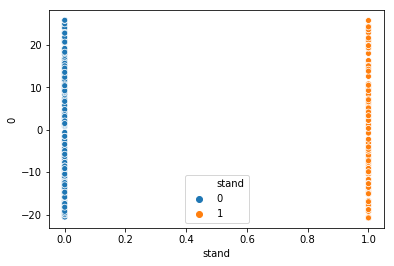

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
s = pd.DataFrame(x_train1).iloc[:,0]
t = pd.DataFrame(x_train1).iloc[:,1]
sns.scatterplot(x=s , y=t , hue=y)
plt.show()

In [8]:
lst1 = []
for s in range(1,17):
    if(abs(dt1.iloc[:,s].mean()-0.5)>0.47):
        lst1.append(s)

In [9]:
lst1

[4, 14]

In [10]:
n_1 = dt.iloc[:,4]
n_2 = dt.iloc[:,14]
new = pd.concat([n_1,y],axis=1)

In [11]:
x_tr, x_te, y_tr, y_te = train_test_split(new , n_2, test_size = 0.1, random_state = 1)

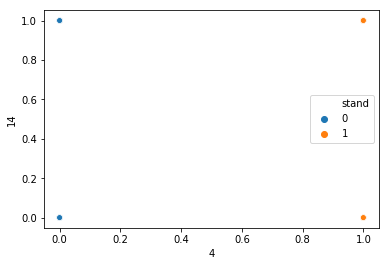

In [12]:
sns.scatterplot(x=x_tr.iloc[:,0] , y=y_tr , hue=y)
plt.show()

In [13]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=0)

In [14]:
out = k_means.fit(pd.concat([x_tr.iloc[:,0],y_tr],axis=1))

In [15]:
pr = k_means.predict(pd.concat([x_te.iloc[:,0],y_te],axis=1))

In [16]:
ac = x_te.iloc[:,1]

In [17]:
ac.shape[0]

44

In [18]:
counter = 0
for i in range(ac.shape[0]):
    if(list(ac)[i]==list(pr)[i]):
        counter += 1
counter/ac.shape[0]

0.9545454545454546